In [1251]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [1252]:
# Read input data from csv file

df = pd.read_csv('input.csv')

In [1253]:
# Function to standardize a data vector

def standardize(data: np.array) -> np.array:
    return 5*(data - np.mean(data, axis=0)) / np.std(data, axis=0)

In [1254]:
# Function to normalize a data vector

def normalize(data: np.array) -> np.array:
    return 5*(data - np.min(data)) / (np.max(data) - np.min(data))

In [1255]:
data = df[['Outstate', 'F.Undergrad', 'Grad.Rate']]
data = data.to_numpy()
label_data = df[['Private']]
label_data = label_data.to_numpy()
data_std = standardize(data)

data.shape[0]

777

In [1256]:
def is_terminated(oldCentroids: np.array, centroids: np.array) -> bool:
    for i in range(centroids.shape[0]):
        for j in range(centroids.shape[1]):
            if abs(oldCentroids[i][j] - centroids[i][j]) > 0.001:
                return False
    return True

In [1257]:
def dist(data, centroid):
    dist_sum = 0
    for i in range(data.shape[0]):
        dist_sum += (data[i] - centroid[i]) ** 2
    return np.sqrt(dist_sum)

In [1258]:
def get_labels(data, centroids) -> np.array:
    labels = np.empty(data.shape[0])
    distances = np.full(data.shape[0], float('inf'))
    
    for i in range(data.shape[0]):
        for c in range(centroids.shape[0]):
            d = dist(data[i], centroids[c])
            if d < distances[i] or distances[i] == float('inf'):
                distances[i] = d
                labels[i] = c
    
    return labels

In [1259]:
def get_centroids_geometric(data, labels, k):
    centroids = np.ones((k, data.shape[1]))
    
    for c in range(0, k):
        centroid_prod = np.empty(centroids.shape[1])
        centroid_cnt = 0
        for i in range(labels.shape[0]):
            if labels[i] == c:
                centroid_cnt += 1
                centroid_prod = centroid_prod * data[i]
                
        n = 1/centroid_prod.shape[0]
        centroids[c] = np.power(centroid_prod, n)

    return centroids

In [1260]:
def get_centroids_arithmetic(data, labels, k):
    centroids = np.zeros((k, data.shape[1]))
    
    for c in range(0, k):
        centroid_sum = np.zeros(centroids.shape[1])
        centroid_cnt = 0
        for i in range(labels.shape[0]):
            if labels[i] == c:
                centroid_cnt += 1
                centroid_sum += data[i]
        if centroid_cnt == 0:
            centroids[c] = data[np.random.randint(0, data.shape[0] - 1)]
        else:
            centroids[c] = centroid_sum / centroid_cnt

    return centroids

In [1261]:
def k_means(data, k):
    
    #these 2 lines
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    oldCentroids = np.zeros((centroids.shape[0], data.shape[1]))
    
    inter = 0
    while not is_terminated(oldCentroids, centroids) and inter < 1000:
        inter += 1
        oldCentroids = centroids
        labels = get_labels(data, centroids)
        
        centroids = get_centroids_arithmetic(data, labels, k)
        
        centroids = np.sort(centroids, axis=0)
        oldCentroids = np.sort(oldCentroids, axis=0)
        
    labels = get_labels(data, centroids)    
    return centroids, labels

In [1262]:
def avg_centroids(data, k):
    centroids = np.empty((k, data.shape[1]))
    
    num_iter = 10
    for i in range(num_iter):
        centroid, label = k_means(data, 2)
        centroids += centroid
    centroids = centroids / num_iter
    labels = get_labels(data, centroids)
    
    return centroids, labels

In [1263]:
centroids, labels = avg_centroids(data, 2)

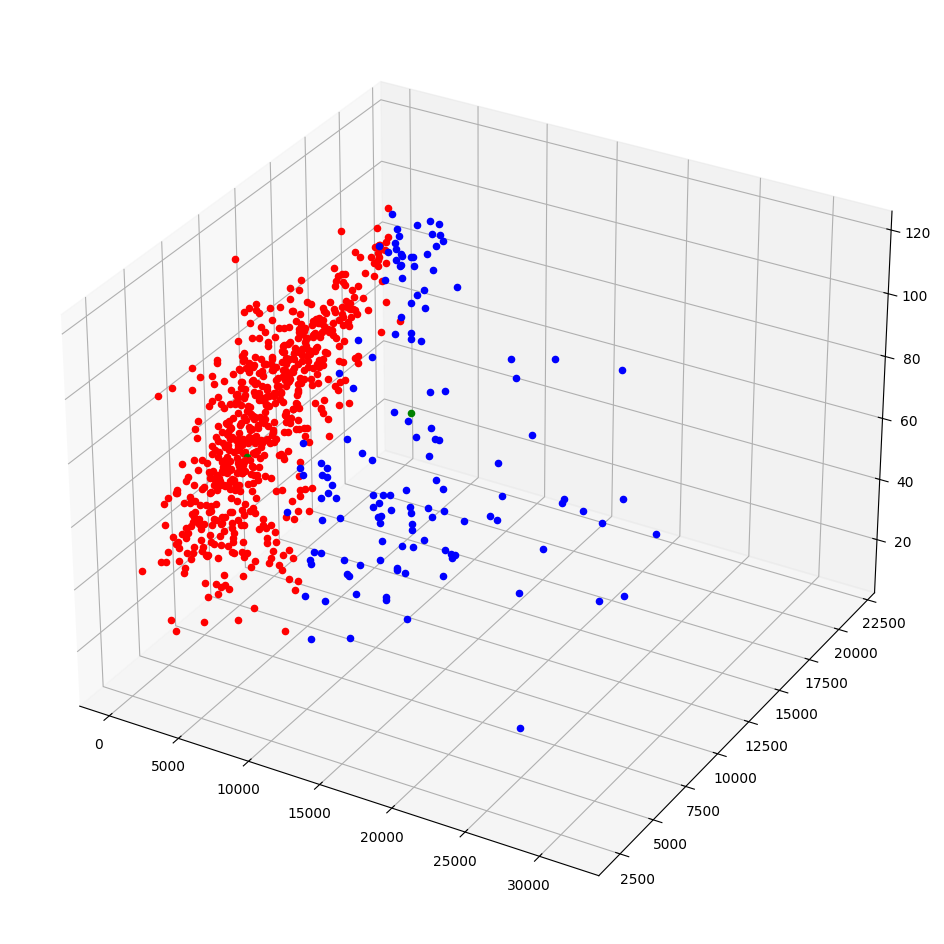

In [1264]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')


# swap x and y: in for loop for red and blue, for loop cyan, real centroids
for i in range(data.shape[0]):
    if labels[i] == 0:
        ax.scatter(data[i][1], data[i][0], data[i][2], c='red')
    else:
        ax.scatter(data[i][1], data[i][0], data[i][2], c='blue')    

    
#ax.scatter(df.loc[:, 'Outstate'], df.loc[:, 'F.Undergrad'], df.loc[:, 'Grad.Rate'])
for i in range(centroids.shape[0]):
   ax.scatter(centroids[i][1], centroids[i][0], centroids[i][2], color='green')

plt.show()

In [1265]:
def find_actual_centroids(data):    
    private_cnt = df['Private'].value_counts()['Yes']
    public_cnt = df['Private'].value_counts()['No']
    privates = np.zeros(data.shape[1])
    publics = np.zeros(data.shape[1])
    
    for i in range(data.shape[0]):
        if label_data[i] == "Yes":
            privates += data[i]
        else:
            publics += data[i]
    
    priv = privates / private_cnt
    pub = publics / public_cnt
    
    return pub, priv

In [1266]:
print(find_actual_centroids(data))

(array([6813.41037736, 8571.00471698,   56.04245283]), array([11801.69380531,  1872.16814159,    68.99823009]))


In [1267]:
cnt = 0
for i in range(data.shape[0]):
    if label_data[i] == "Yes" and labels[i] == 0:
        cnt += 1
    if label_data[i] == "No" and labels[i] == 1:
        cnt += 1
print(cnt/data.shape[0])

0.7773487773487774


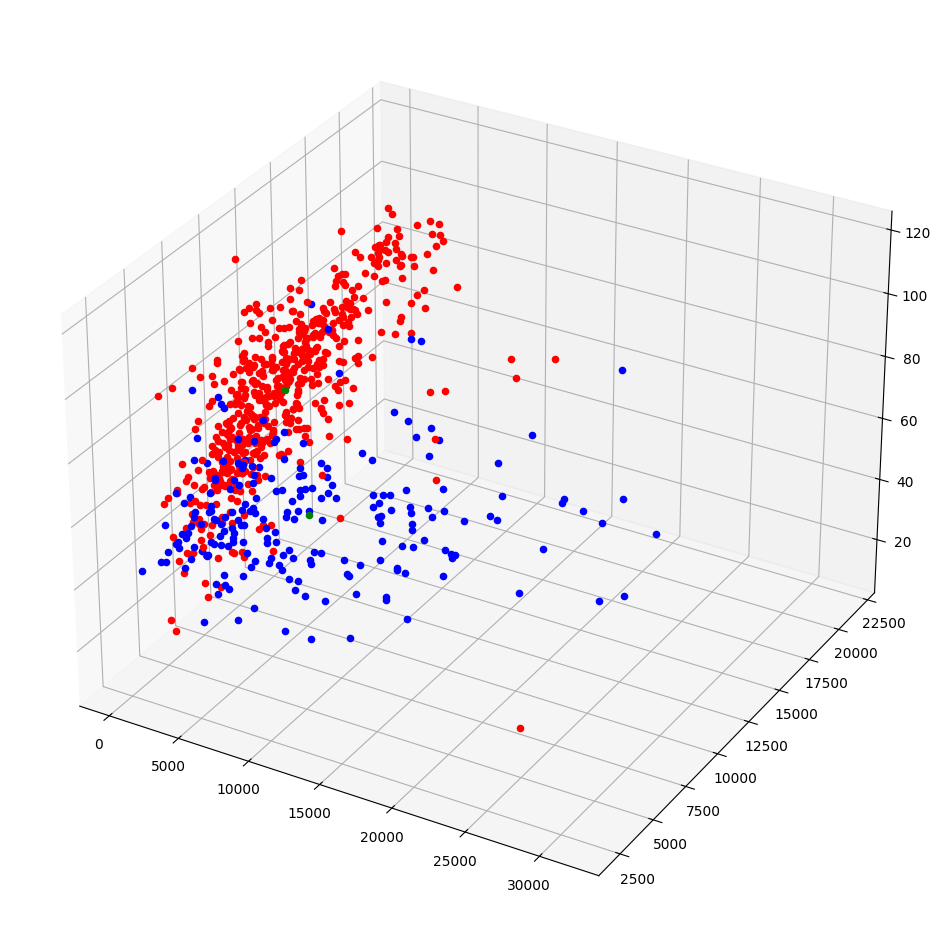

In [1268]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# swap x and y: in for loop for red and blue, for loop cyan, real centroids
for i in range(data.shape[0]):
    if label_data[i] == "Yes":
        ax.scatter(data[i][1], data[i][0], data[i][2], c='red')
    else:
        ax.scatter(data[i][1], data[i][0], data[i][2], c='blue')    

    
#for i in range(centroids.shape[0]):
#   ax.scatter(centroids[i][0], centroids[i][1], centroids[i][2], color='cyan')
    
ax.scatter(1872.16814159, 11801.69380531  , 68.99823009, color='green')
ax.scatter( 8571.00471698,6813.41037736, 56.04245283, color='green')

plt.show()

# Standardized Data

In [1269]:
centroids_std, labels_std = k_means(data_std, 2)

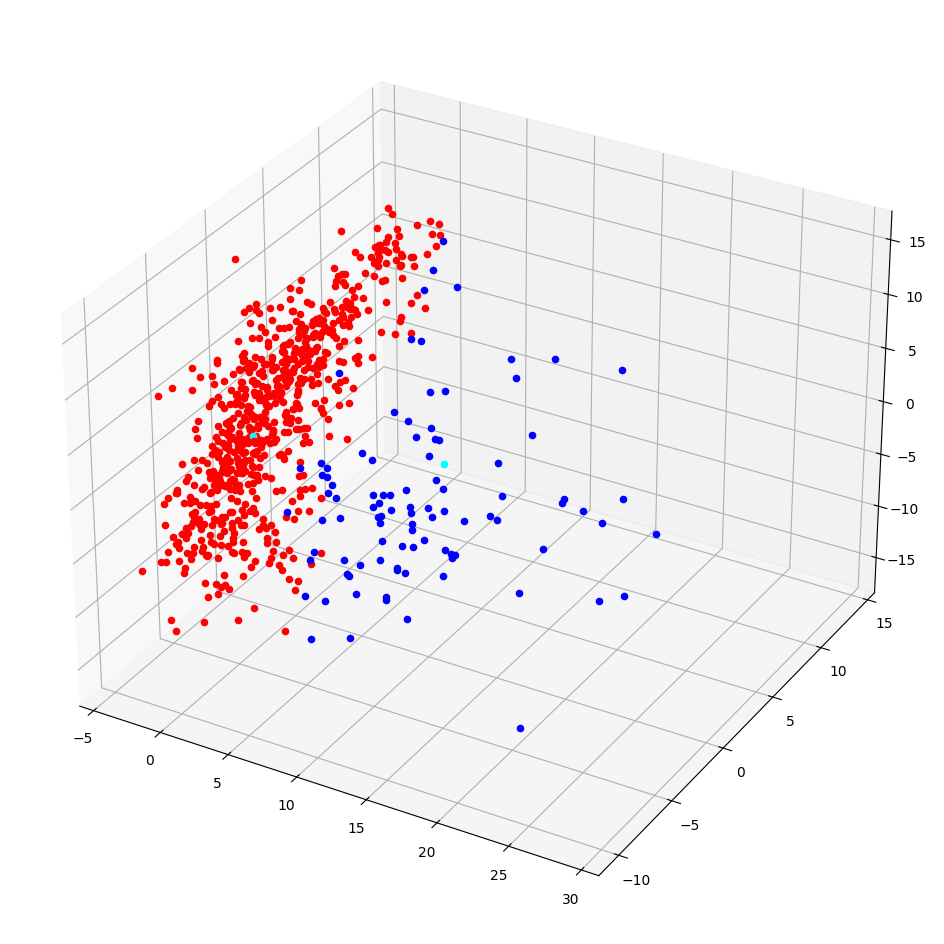

In [1270]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')


# swap x and y: in for loop for red and blue, for loop cyan, real centroids
for i in range(data_std.shape[0]):
    if labels_std[i] == 0:
        ax.scatter(data_std[i][1], data_std[i][0], data_std[i][2], c='red')
    else:
        ax.scatter(data_std[i][1], data_std[i][0], data_std[i][2], c='blue')    

    
for i in range(centroids_std.shape[0]):
   ax.scatter(centroids_std[i][1], centroids_std[i][0], centroids_std[i][2], color='cyan')

plt.show()

In [1271]:
print(find_actual_centroids(data_std))

(array([-4.51103702,  5.02454883, -2.7439443 ]), array([ 1.6926369 , -1.88531744,  1.02958618]))


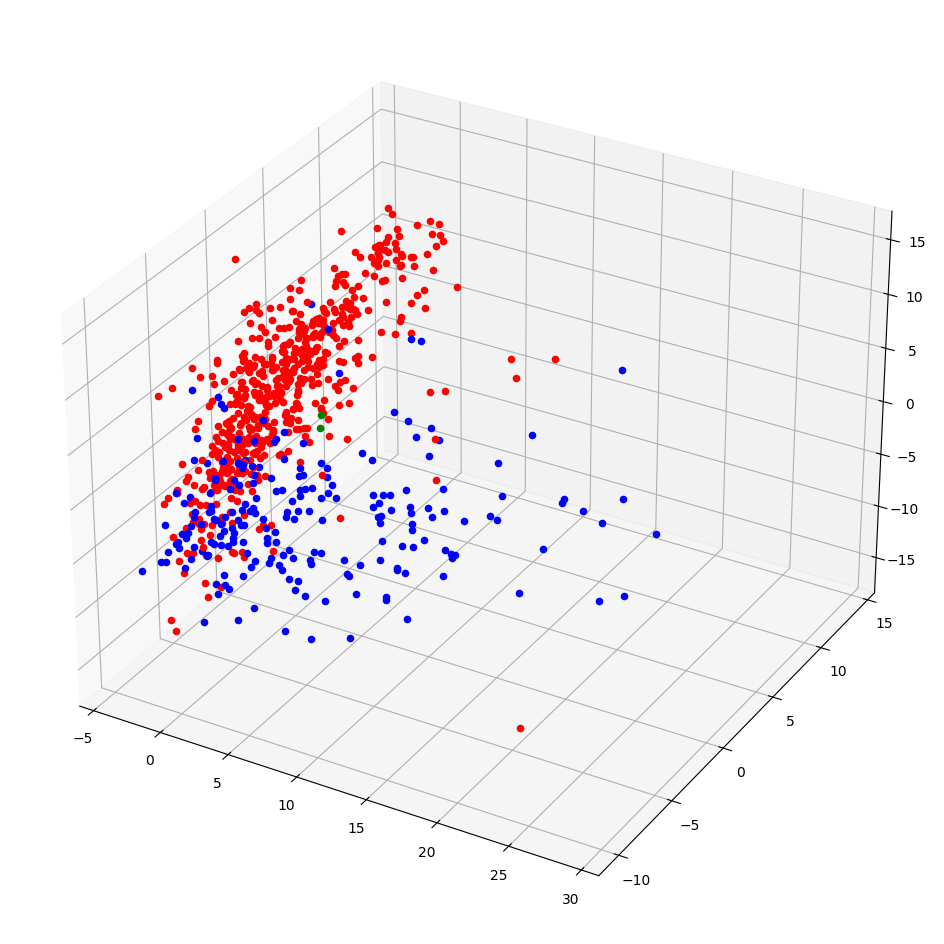

In [1272]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# swap x and y: in for loop for red and blue, for loop cyan, real centroids
for i in range(data_std.shape[0]):
    if label_data[i] == "Yes":
        ax.scatter(data_std[i][1], data_std[i][0], data_std[i][2], c='red')
    else:
        ax.scatter(data_std[i][1], data_std[i][0], data_std[i][2], c='blue')    


ax.scatter(1.07536597,1.35317623,   0.0072776, color='green')
ax.scatter( 1.86382793,0.29433948, 0.00932542, color='green')

plt.show()

# Compare K-Values

In [1275]:
def sum_squared_error(data, k):
    centroids, labels = k_means(data, k)
    d = 0
    for i in range(data.shape[0]):
        centroid = centroids[int(labels[i])]
        d += np.sum((data[i] - centroid) ** 2)
    return d

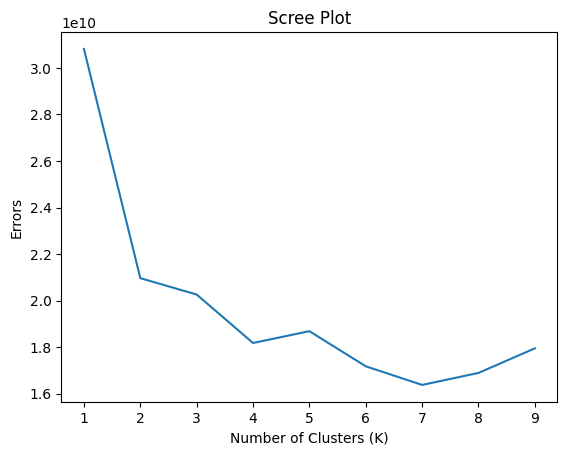

In [1276]:
k_values = range(1, 10)

errors = [sum_squared_error(data, k) for k in k_values]

plt.plot(k_values, errors)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Errors')
plt.title('Scree Plot')
plt.show()